In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('ratings_2.csv')
ratings_f = ratings.groupby('rating').agg(['count'])['movieId'].sort_values('count', ascending=False).reset_index()
ratings_f

,rating,count
0,4.0,28750
1,3.0,20064
2,5.0,15095
3,3.5,10538
4,4.5,7723
5,2.0,7271
6,2.5,4449
7,1.0,3326
8,1.5,1687
9,0.5,1101


Text(20000, 3.3, 'Most common rating')

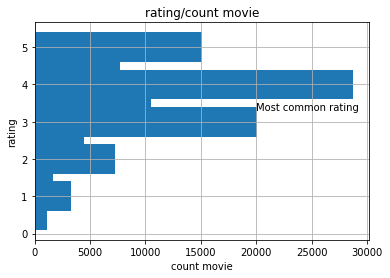

In [3]:
#Какие оценки чаще/реже всего ставят?
plt.barh(ratings_f['rating'], ratings_f['count'])  # stroim grafik
# plt.show()
plt.xlabel('count movie') #nazvanie osi x
plt.ylabel('rating') #nazvanie osi y
plt.title('rating/count movie') #nazvanie grafika / zagolovok
plt.grid() #dobavit setky
plt.text(20000, 3.3, 'Most common rating') #podpis tochki na grafike

In [33]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
marathon = pd.read_csv('1_full_results_mm_2018.csv')
# ratings_sca = ratings.groupby(['userId', 'rating']).agg(['count'])['movieId'].sort_values('count', ascending=False).reset_index().head(20)
marathon.head()

,bib,finish_time_sec,finish_time_result,race,pace_sec,pace(minpkm),pace(kmph),half_pace_sec,half_pace(minpkm),half_pace(kmph),gender_en,age,name_en,location_city_ru,location_city_en,country_code_alpha_3,flag_DNF,flag_all_split_exist,race_uniform_index
0,1,8911.0,2h 28min 31sec,42.195 km,211.186159,3:31 min/km,17.0 km/h,208.318521,3:28 min/km,17.3 km/h,Female,30,Sardana Trofimova,Якутск,Yakutsk,RUS,0,1,0.000133
1,2,9308.0,2h 35min 08sec,42.195 km,220.594857,3:40 min/km,16.3 km/h,212.157839,3:32 min/km,17.0 km/h,Female,35,Tat'yana Arkhipova,Чебоксары,Cheboksary,RUS,0,1,0.002556
2,3,8122.0,2h 15min 22sec,42.195 km,192.487262,3:12 min/km,18.7 km/h,189.880318,3:09 min/km,19.0 km/h,Male,31,Stepan Kiselev,Казань,Kazan',RUS,0,1,0.000397
3,4,8467.0,2h 21min 07sec,42.195 km,200.663586,3:20 min/km,17.9 km/h,186.894182,3:06 min/km,19.3 km/h,Male,36,Dmitriy Safronov,Москва,Moskva,RUS,0,1,0.009003
4,5,8738.0,2h 25min 38sec,42.195 km,207.086148,3:27 min/km,17.4 km/h,194.904610,3:14 min/km,18.5 km/h,Male,42,Grigoriy Andreev,Уфа,Ufa,RUS,0,1,0.006439


In [14]:
# sns.pairplot(master)

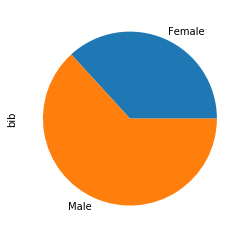

In [5]:
marathon_mf_count = marathon.groupby(['gender_en'])['bib'].count()
# name_dynamics.plot(kind='pie')
marathon_mf_count.plot(kind='pie', y='bib') # соотношениие кол-ва мужчинн и женшин бегунов в забеге на 10 и 42 км. 

In [7]:
marathon_42 = marathon.loc[marathon.race == '42.195 km']
marathon_42.head()

,bib,finish_time_sec,finish_time_result,race,pace_sec,pace(minpkm),pace(kmph),half_pace_sec,half_pace(minpkm),half_pace(kmph),gender_en,age,name_en,location_city_ru,location_city_en,country_code_alpha_3,flag_DNF,flag_all_split_exist,race_uniform_index
0,1,8911.0,2h 28min 31sec,42.195 km,211.186159,3:31 min/km,17.0 km/h,208.318521,3:28 min/km,17.3 km/h,Female,30,Sardana Trofimova,Якутск,Yakutsk,RUS,0,1,0.000133
1,2,9308.0,2h 35min 08sec,42.195 km,220.594857,3:40 min/km,16.3 km/h,212.157839,3:32 min/km,17.0 km/h,Female,35,Tat'yana Arkhipova,Чебоксары,Cheboksary,RUS,0,1,0.002556
2,3,8122.0,2h 15min 22sec,42.195 km,192.487262,3:12 min/km,18.7 km/h,189.880318,3:09 min/km,19.0 km/h,Male,31,Stepan Kiselev,Казань,Kazan',RUS,0,1,0.000397
3,4,8467.0,2h 21min 07sec,42.195 km,200.663586,3:20 min/km,17.9 km/h,186.894182,3:06 min/km,19.3 km/h,Male,36,Dmitriy Safronov,Москва,Moskva,RUS,0,1,0.009003
4,5,8738.0,2h 25min 38sec,42.195 km,207.086148,3:27 min/km,17.4 km/h,194.904610,3:14 min/km,18.5 km/h,Male,42,Grigoriy Andreev,Уфа,Ufa,RUS,0,1,0.006439


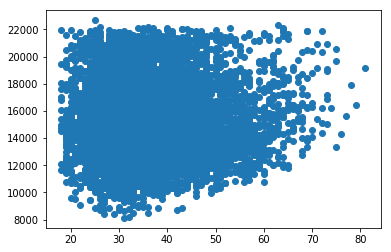

In [8]:
plt.scatter(marathon_42.age, marathon_42.finish_time_sec) # с возрастом время увеличивается, участников в возрасте меньше и их результ болизок к серднему.

/home/darya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


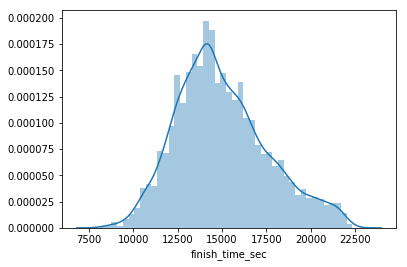

In [9]:
sns.distplot(marathon_42.finish_time_sec.loc[~marathon_42.finish_time_sec.isna()])
# по гистограмме видно что самое распостраненное время финиша в рай-не 3ч53мин

In [10]:
marathon_42_heat = marathon_42.loc[~(marathon_42.country_code_alpha_3 == 'RUS')].pivot_table(
                        index='age', 
                        columns='country_code_alpha_3', 
                        values='bib', 
                        aggfunc='count').fillna(0).applymap(float)

marathon_42_heat.head()

country_code_alpha_3,-,ARE,AUS,AUT,AZE,BEL,BIH,BLR,BRA,CAN,...,SEN,SRB,SVN,SWE,THA,TWN,UKR,UZB,VEN,ZAF
age,,,,,,,,,,,,,,,,,,,,,
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
marathon_42_heat_T = marathon_42_heat.T
marathon_42_heat_T['sum'] = marathon_42_heat_T.sum(axis=1)
marathon_42_heat_T = marathon_42_heat_T.sort_values('sum', ascending=False).drop('sum', axis=1)
marathon_42_heat = marathon_42_heat_T.T

In [12]:
marathon_42_heat.head()

country_code_alpha_3,THA,CHN,BLR,HKG,DEU,ITA,ESP,GBR,UKR,KOR,...,CAN,PRT,LTU,PHL,PER,NOR,IDN,MLT,MKD,MNG
age,,,,,,,,,,,,,,,,,,,,,
20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


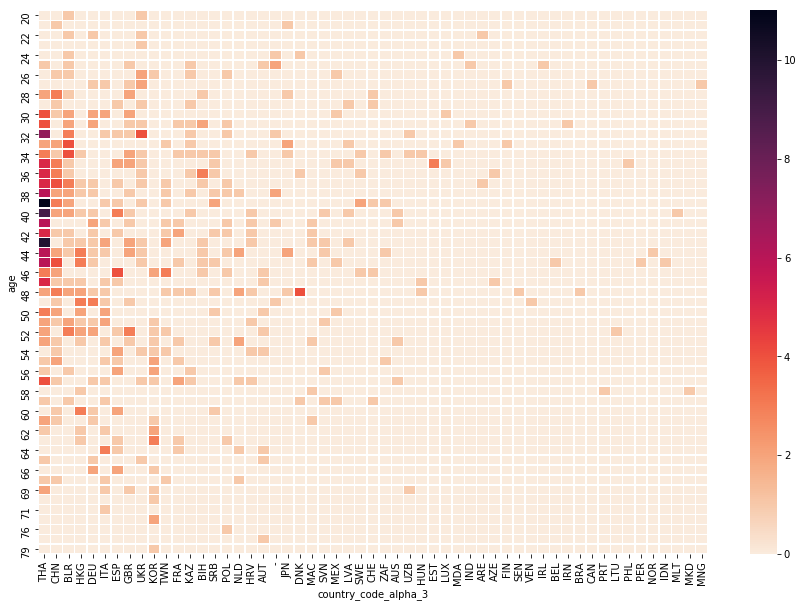

In [13]:
# Возраст и кол-во участников по странам за исключением России.
cmap = sns.cm.rocket_r # инвертирование цвета графика
plt.figure(figsize=(15,10)) # размер графика
sns.heatmap(marathon_42_heat, annot=False, # annot=False - не показывать значения в квадратах 
            linewidths=0.5, cmap=cmap) # linewidths=0.5 - толшина сетки